<a href="https://colab.research.google.com/github/lmendezayl/uba-ldd-ic/blob/main/guias/soluciones/practica8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 8: Clustering y Clasificacion

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler


In [15]:
# manejo de importación datasets
url_base = 'https://raw.githubusercontent.com/lmendezayl/uba-ldd-ic/refs/heads/main/datasets/'
def import_csv(path: str):
    try:
        csv = pd.read_csv(path)
    except:
        csv =  pd.read_csv(url_base + path)
    return csv

Terminar:
- 3: e, f
- 5
- 6
- 7

Preguntar:
- 1: a (codigo de kmeans)

## Clustering



 ### Ejercicio 1.

 Dada la siguiente tabla de datos

| x  | y  |
|----|----|
| -1 | 2 |
| 0  | 1 |
| 1  | 2 |
| 8/5| 2 |
| 2  | 1 |
| 3  | 2 |
| 4  | 1 |

 Utilizar a mano el metodo de k-medias para agrupar los datos en 2 clusters.


In [3]:
datos = pd.DataFrame({
    "x": [-1,0,1,8/5,2,3,4],
    "y":[2,1,2,2,1,2,1]
})


 #### (a)
 Comenzando con $b_1 = (1, 2)$ y $b_2 = (3,2)$


In [4]:
centros = np.array([[1,2],[3,2]])

Pseudocodigo de la implementacion estandar del algoritmo de k-means.

``` python
def k_means_cluster(k, points):
    # Initialization: choose k centroids (Forgy, Random Partition, etc.)
    centroids = [c1, c2, ..., ck]
    
    # Initialize clusters list
    clusters = [[] for _ in range(k)]
    
    # Loop until convergence
    converged = false
    while not converged:
        # Clear previous clusters
        clusters = [[] for _ in range(k)]
    
        # Assign each point to the "closest" centroid
        for point in points:
            distances_to_each_centroid = [distance(point, centroid) for centroid in centroids]
            cluster_assignment = argmin(distances_to_each_centroid)
            clusters[cluster_assignment].append(point)
        
        # Calculate new centroids
        #   (the standard implementation uses the mean of all points in a
        #     cluster to determine the new centroid)
        new_centroids = [calculate_centroid(cluster) for cluster in clusters]
        
        converged = (new_centroids == centroids)
        centroids = new_centroids
        
        if converged:
            return clusters
```

In [5]:
def naive_k_means(k, points):
    '''Naive K-Means'''


    # - wait...is all cauchy sequences?
    # - always has been...
    # (la diferencia entre centroides se vuelve constante en finitos pasos => de Cauchy)

    # defino los centroides al azar
    # debuggear, no se como garantizar que no se repitan
    # entiendo que no convergen si sucede lo anterior
    centroids = [points[np.random.randint(low=0,high=k)] for _ in range(k)]
    # condicion de centroides isometricos
    converge = False
    while not converge:
        clusters = [[] for _ in range(k)]
        for point in points:
            # usamos norma euclidea, preguntar si se pueden tomar otras normas
            distances_m = [np.linalg.norm(point - centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances_m)
            clusters[cluster_idx].append(point)
        # ACA creo que se rompe
        n_centroids = []
        # manejo de clusters vacios
        for cluster in clusters:
            if len(cluster) == 0:
                # le mandamos 42 por meme
                n_centroids.append(np.random.rand(42))
            else:
                # sin axis=0 no funca, pues toma promedio coord a coord, preguntar
                n_centroids.append(np.mean(cluster, axis=0))
        # verificamos convergencia (lo cual debe pasar si Cj != Ck para todo j != k en C = centroides)
        converge = not np.allclose(np.array(centroids), np.array(n_centroids), atol=1e-8)
        centroids = n_centroids
        if converge:
            return clusters


def clusters_to_labels(clusters, points): # esto no lo hice yo, no se me caia una idea... (ni lo intente, son la 1am)
    labels = np.empty(len(points), dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for point in cluster:
            i = np.where(np.all(points == point, axis=1))[0][0]
            labels[i] = cluster_idx
    return labels

# preguntar ...
# X, v = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)
# clusters = k_means(4, X)
# labels = clusters_to_labels(clusters, X)

In [6]:
# naive k-means
# este funcion fr (y lo hice sin pseudocodigo)
def k_means(datos, centros, n):
    centros_nuevos = centros.copy()
    k = len(centros)
    nDatos = len(datos)
    distMat = np.zeros((nDatos, k))

    for j in range(n):
        for i, centro in enumerate(centros_nuevos):
            dist = np.linalg.norm(datos - centro, axis=1)
            distMat[:,i] = dist
        etiquetas = np.argmin(distMat, axis=1)
        for i in range(k):
            cluster = datos[etiquetas == i]
            if len(cluster) > 0:
                centros_nuevos[i] = cluster.mean(axis=0)

    etiquetas = np.argmin(distMat, axis=1)
    etiquetas = pd.Series(etiquetas).astype("str")

    return etiquetas

In [7]:
k_means(datos, centros, 20)

,0
0,0
1,0
2,0
3,1
4,1
5,1
6,1



 #### (b)
 Comenzando con $b_1 = (0,1)$ y $b_2 = (3,2)$


In [8]:
centros = [[0,1],[3,2]]
k_means(datos, centros, 20)

,0
0,0
1,0
2,0
3,1
4,1
5,1
6,1



 Se obtiene la misma clasificacion? Alguna de las clasificaciones obtenidas le parece mas
 apropiada?


they're the same picture..


 ### Ejercicio 2.
  Considere los datasetets `p7-data1.csv` y `p7-data2.csv` de datos artificialmente generados.



 #### (a)
 Abra cada dataset en Python y genere un diagrama de dispersion (scatter plot) para cada uno.


In [9]:
df1 = import_csv('p7-data1.csv')
df2 = import_csv('p7-data2.csv')
df1['source'] = 'Dataset 1'
df2['source'] = 'Dataset 2'
# buscar porque es necesario el ignore_index
df = pd.concat([df1, df2], ignore_index=True)

No muestro las tablas porque son meros puntos en R². Nada de especial a simple vista, veamos los scatter:

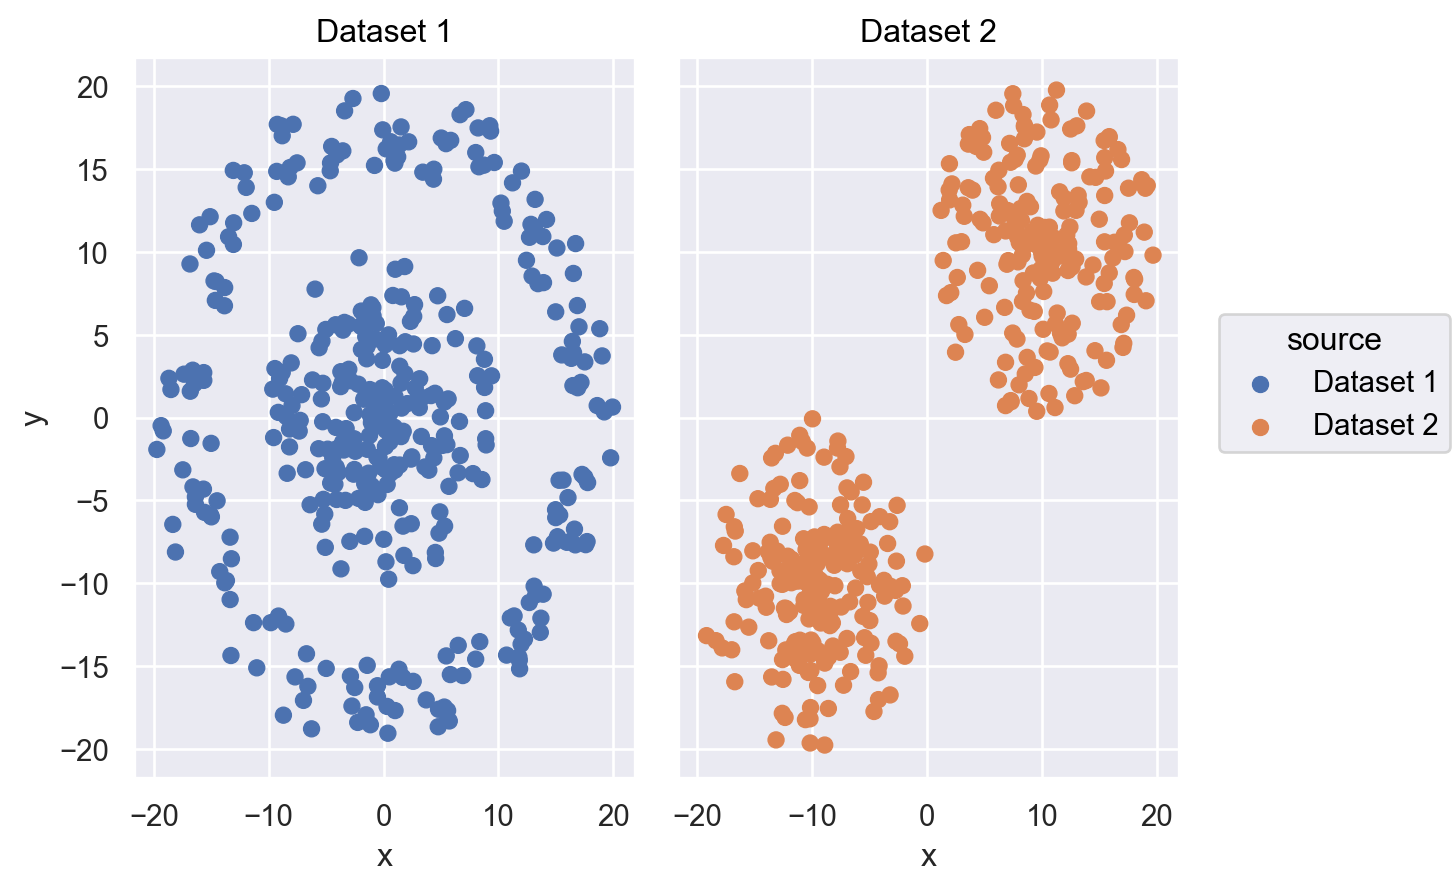

In [10]:
(
    so.Plot(data=df, x='x', y='y', color='source')
    .add(so.Dot())
    .facet(col='source') # repasar .facet()....
)

Claramente estan en clusters de circulos concentricos y en blobs, resp.

Veamos como se ven encimados:

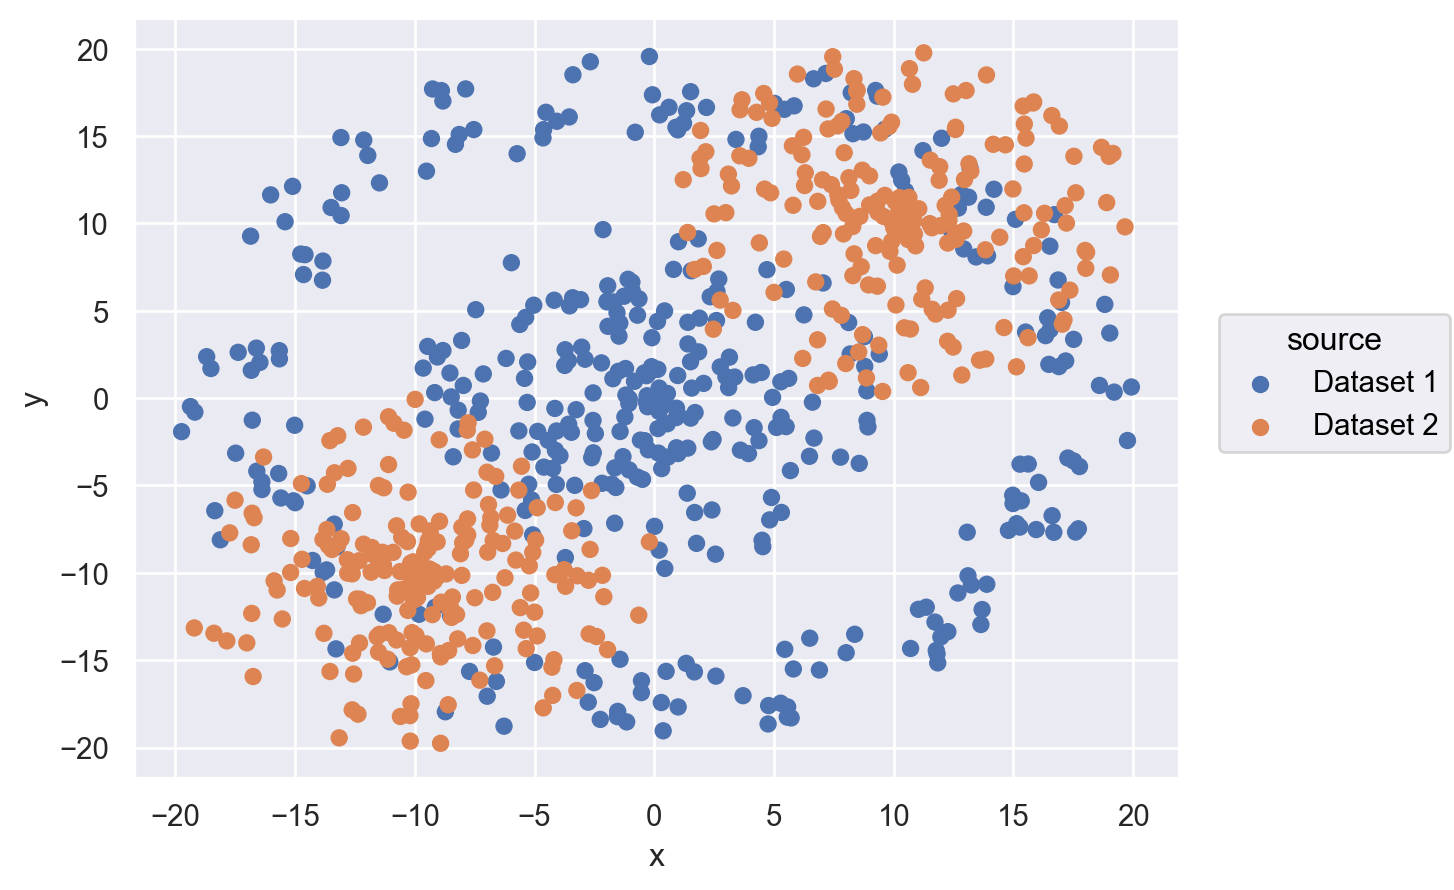

In [13]:
so.Plot(df, df.x, df.y, color='source').add(so.Dot())


 #### (b)
  Analizando los graficos a mano considere cuantos clusters estan presentes.


Hay 4 clusters, 2 en cada dataset, los del dataset 1 salen por DBSCAN, y los del dataset 2 salen por K-Means.


 #### (c)
  Pruebe ejecutar el comando `KMeans` con la cantidad de clusters que detecto. Analizar el
 comportamiento del procedimiento en cada caso.


In [12]:
df[['x','y']]

,x,y
0,1.765881,-8.314427
1,6.483456,-3.332369
2,-8.480197,0.067655
3,4.706642,7.349470
4,4.502446,-8.135970
...,...,...
795,-13.460662,-8.664289
796,-9.436479,-8.141267
797,-16.833373,-8.395061
798,-10.292005,-12.148429


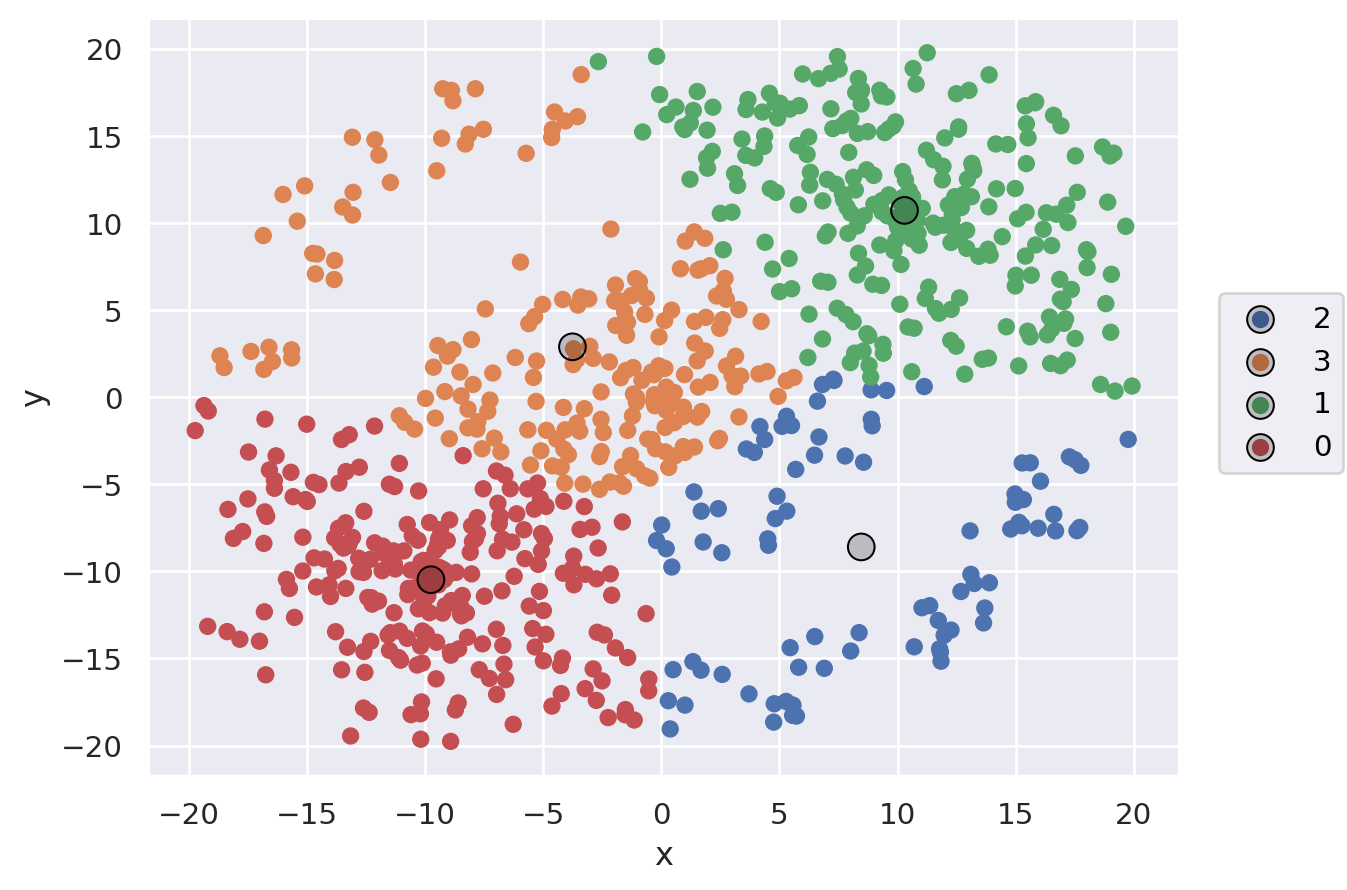

In [13]:
kmeans = KMeans(n_clusters=4)# usa k_means++... the cake is a lie...
etiquetas = kmeans.fit_predict(df[['x','y']])
centros = kmeans.cluster_centers_

(
    so.Plot(x = df.x, y = df.y, color = etiquetas.astype(str))
    .add(so.Dot())
    # so.Dots() hace que sean la frontera del punto en cuestion
    .add(so.Dots(color = "black", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

Esta gaga, no los detectó bien, habría que usar DBSCAN y KMeans por separado en los datasets, guardar el conjunto al que pertenecen en una columna, y graficar con el color acorde al cluster al que pertenecen.


 ### Ejercicio 3.
  Considerar el dataset `p7-iris.txt` (para leer el archivo, observar que los datos estan separados
 por tabulaciones). En este ejercicio trataremos de identificar las distintas subespecies.



 #### (a)
  Cargue el archivo `p7-iris.txt`.


In [14]:
df_iris = import_csv('p7-iris.txt')
df_iris.head()

,LongSepalo\tAnchoSepalo\tLongPetalo\tAnchoPetalo
0,5.1\t3.5\t1.4\t0.2
1,4.9\t3\t1.4\t0.2
2,4.7\t3.2\t1.3\t0.2
3,4.6\t3.1\t1.5\t0.2
4,5\t3.6\t1.4\t0.2


In [15]:
# I need a hero,
df_iris = pd.read_csv(url_base + 'p7-iris.txt', sep="\t")
df_iris.head()

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



 #### (b)
  Grafique en un diagrama de dispersion la longitud del petalo vs el ancho del petalo.


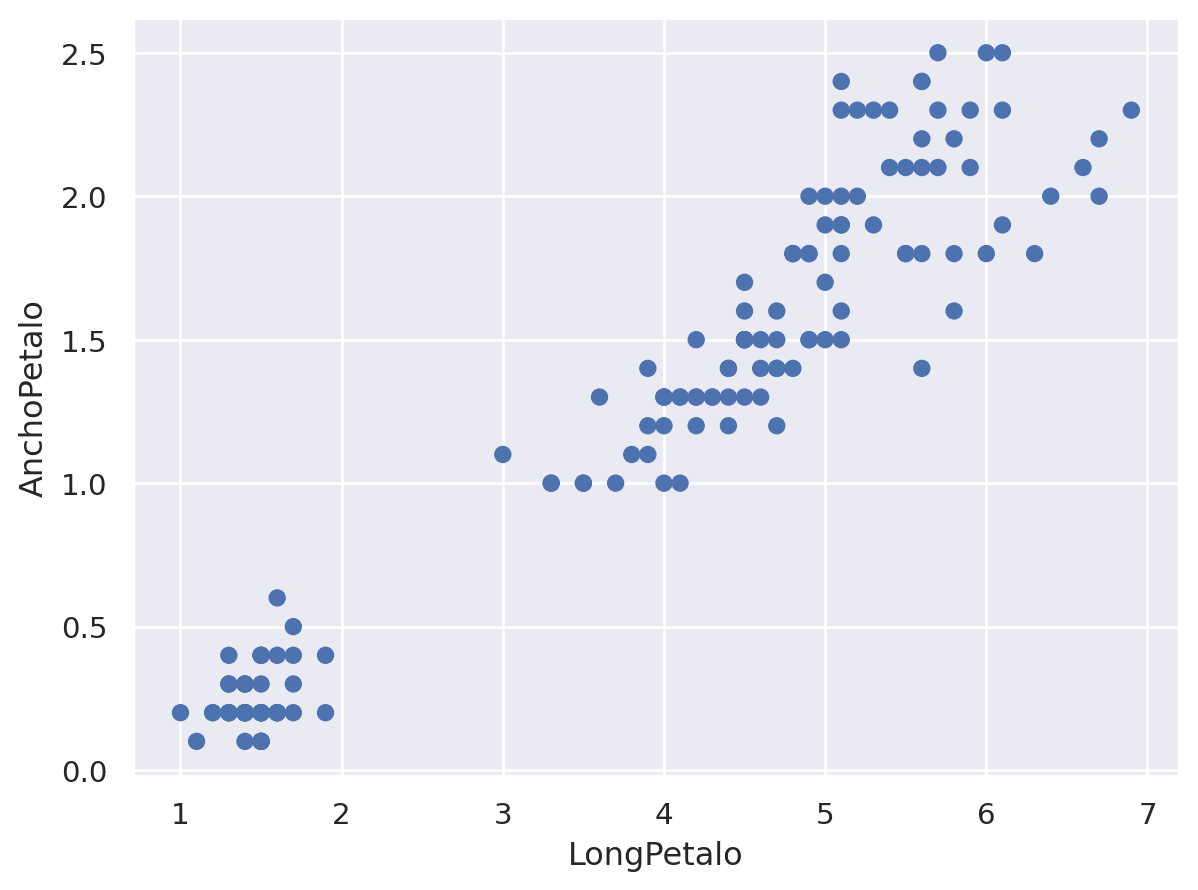

In [16]:
(
    so.Plot(data=df_iris, x='LongPetalo', y='AnchoPetalo')
    .add(so.Dot())
)


 #### (c)
  Efectue un clustering k-medias con el comando KMeans de los datos basados en las cuatro columnas de datos, considere $k = 3$ clusters.


In [17]:
kmeans = KMeans(n_clusters=3)
etiquetas = kmeans.fit_predict(df_iris)


 #### (d)
  Repita el inciso b) coloreando en funcion del indice de cluster obtenido.


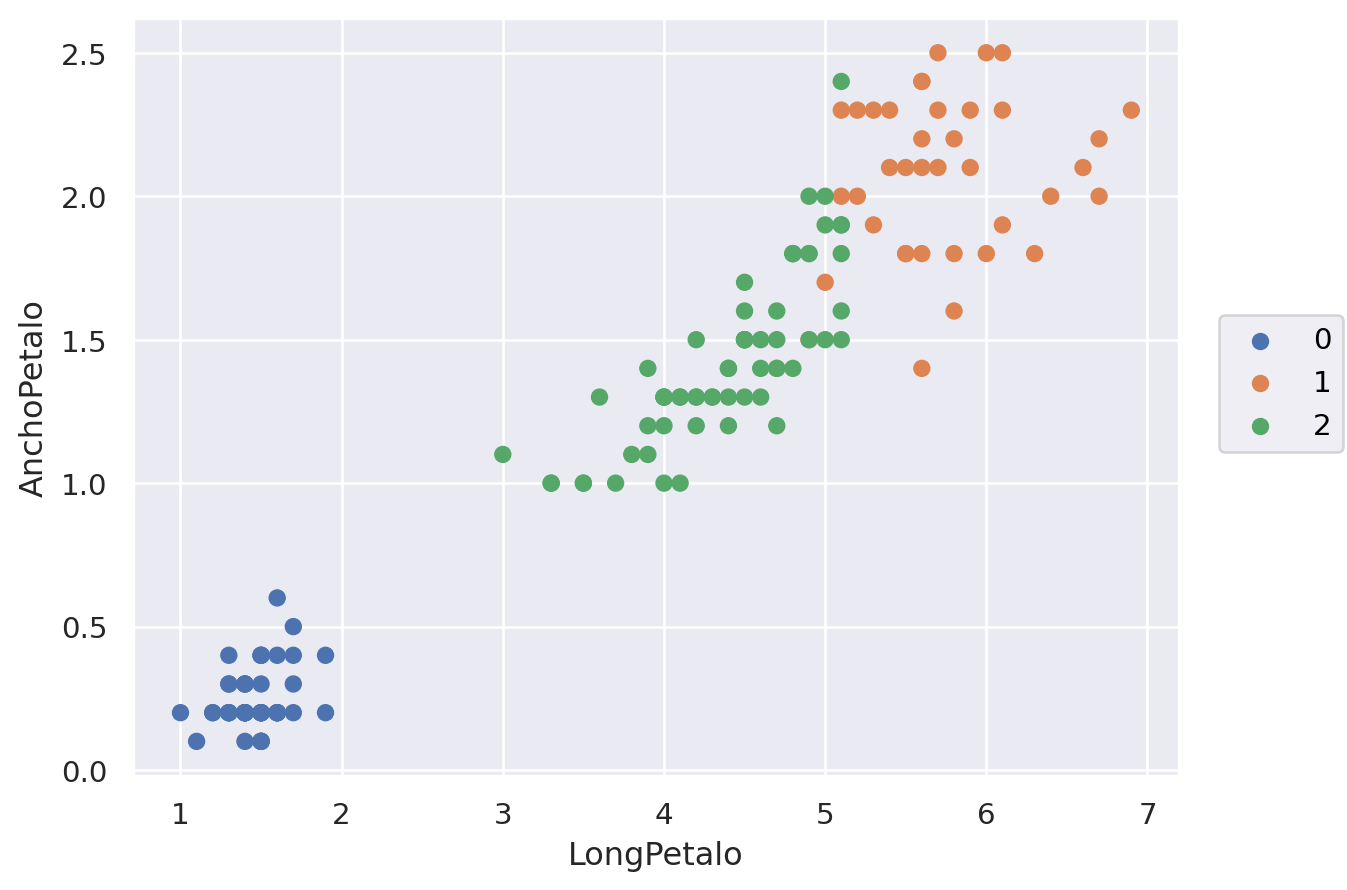

In [18]:
# es basicamente agregarle los colores por etiqueta
(
    so.Plot(data=df_iris, x='LongPetalo', y='AnchoPetalo', color=etiquetas.astype(str))
    .add(so.Dot())
)


 #### (e)
Evalue el error de clustering en funcion de la siguiente formula (within-cluster sum of
 squares, WCSS):
 $$WCSS = \sum_{i=1}^k \sum_{x \in C_i} ||x-\mu_i||^2$$
 donde $Ci$ representa el cluster i-esimo y i es el centroide de dicho cluster, de nido como
 $$\mu_i = \frac{1}{\#C_i}\sum_{x \in C_i} x$$
 *Python ofrece una forma de calcular esto de forma directa.*

 *(Mirar el archivo `p7-ejercicioPetalos.ipynb`)*

In [19]:
# TODO


 #### (f)
  Repita el ensayo para distintos valores de k, entre 1 y 10, graficando el WCSS para cada valor de k. Analizar el mejor valor de k posible teniendo en cuenta un compromiso entre complejidad (es decir, cantidad de clusters) y nivel de error (es decir, el WCSS).


In [20]:
# TODO


 ### Ejercicio 4.
 Consideremos el dataset de datos artificiales p7-dataSinEscalar.csv.



 #### (a)
  Cargar los datos y grafcarlos.


,x,y
0,0.002501,6488.26703
1,-0.026980,2521.94722
2,-0.029001,3068.77291
3,0.007030,4314.27482
4,-0.025356,2384.49945


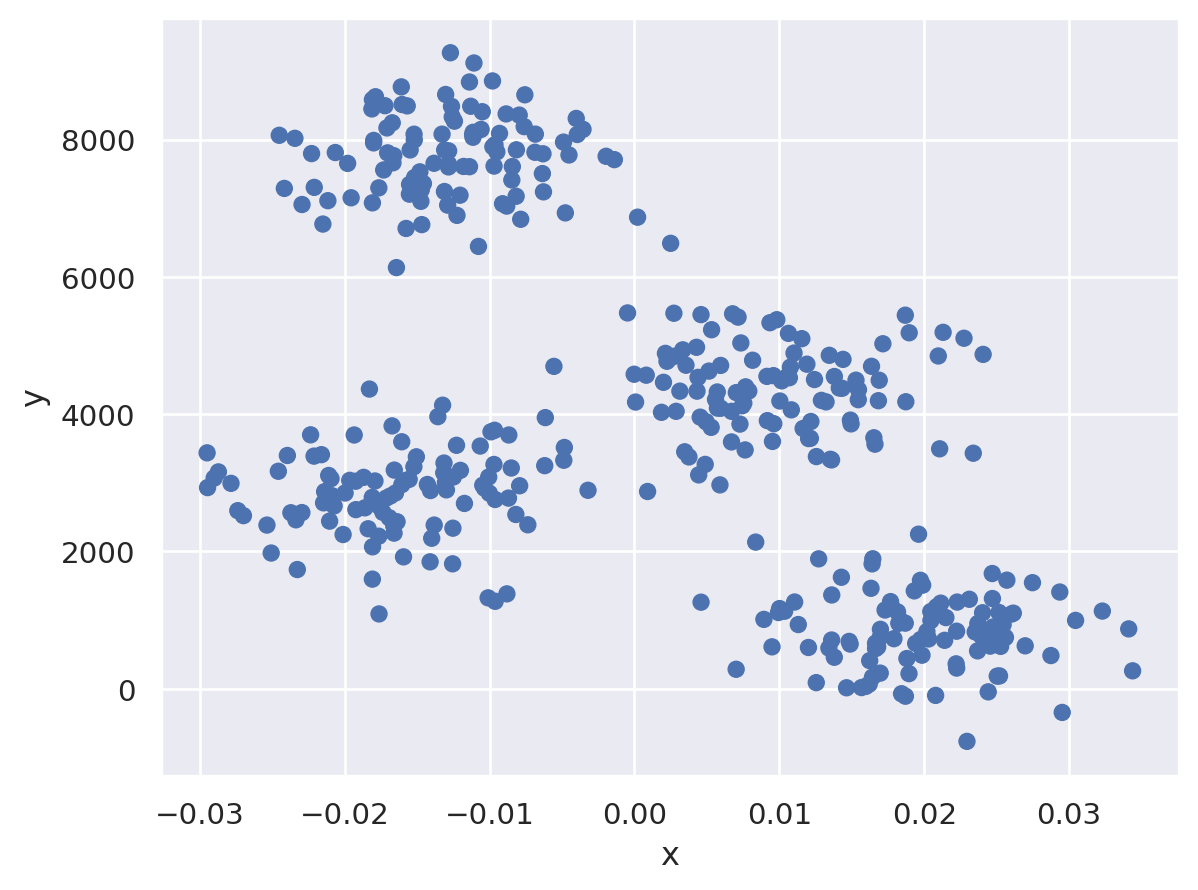

In [21]:
# df_4 por ejercicio 4
df_4 = pd.read_csv(url_base + 'p7-dataSinEscalar.csv')

# mamita los 3 minutos que perdi con esta pelotudez
df_4 = df_4.rename(columns={' y': 'y'})

display(df_4.head()) # jaja 4head
(
    # o sea, pude haber puesto y=' y'
    # pero es ponerle una curita a un escopetazo
    so.Plot(data=df_4, x='x', y='y')
    .add(so.Dot())
)


 #### (b)
  A priori y mirando el grafico, determine la cantidad de clusters que puede detectar en los
 mismos e imagine inicialmente como debieran ser esos clusters.


Se ven a ojo que hay 4 clusters.


 #### (c)
  Realizar un clustering k-medias con el valor de k antes determinado.


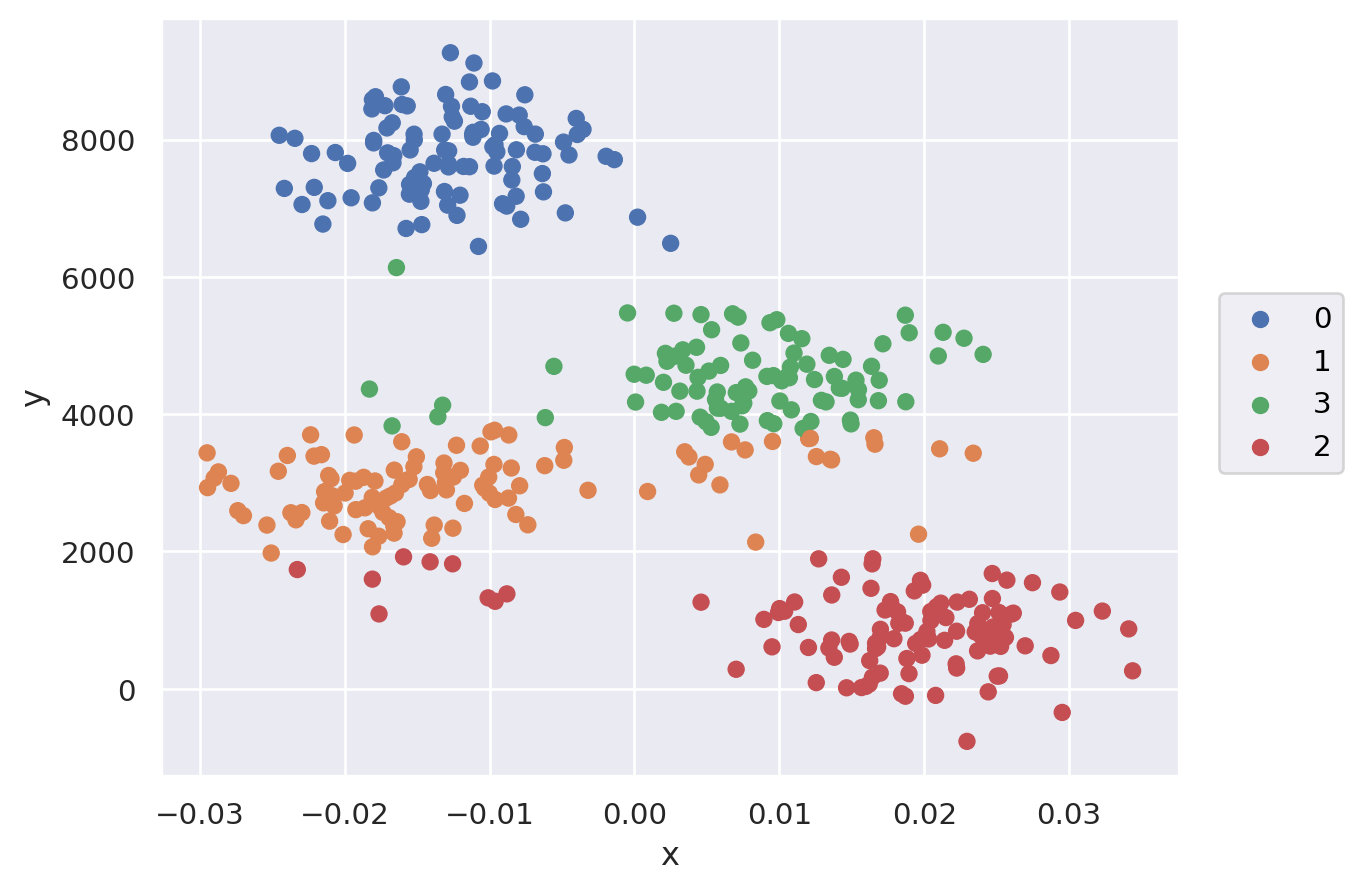

In [22]:
kmeans = KMeans(n_clusters=4)
# el mejor? el blue label
labels = kmeans.fit_predict(df_4)
(
    so.Plot(data=df_4, x='x', y='y', color=labels.astype('str'))
    .add(so.Dot())
)

xd


 #### (d)
 Considera satisfactorio el clustering obtenido? Representa lo que usted esperaba?



 #### (e)
 Uno de los problemas que tenemos es que el metodo de k-medias es muy sensible a las
 diferencias de escala entre las dimensiones. Una forma de corregir eso es re-escalando las
 variables de forma tal que todas se muevan en el mismo rango. Por ejemplo, podemos
 conseguir eso efectuando una normalizacion como sigue:

 $$X_{ij} = \frac{X_{ij} - min(X_j)}{max(X_j) - min(X_j)}$$

 De esta manera, logramos que los datos de cada columna caigan entre 0 y 1. Normalice los datos siguiendo este criterio.

 (Mirar en Python el comando `MinMaxScaler`)



In [23]:
scaler = MinMaxScaler()
df_4_scaled = scaler.fit_transform(df_4)


 #### (f)
 Vuelva a correr el procedimiento de clustering, tome las etiquetas de clustering obtenidos y grafique los datos originales con un color que dependa del clustering obtenido con los datos escalados.


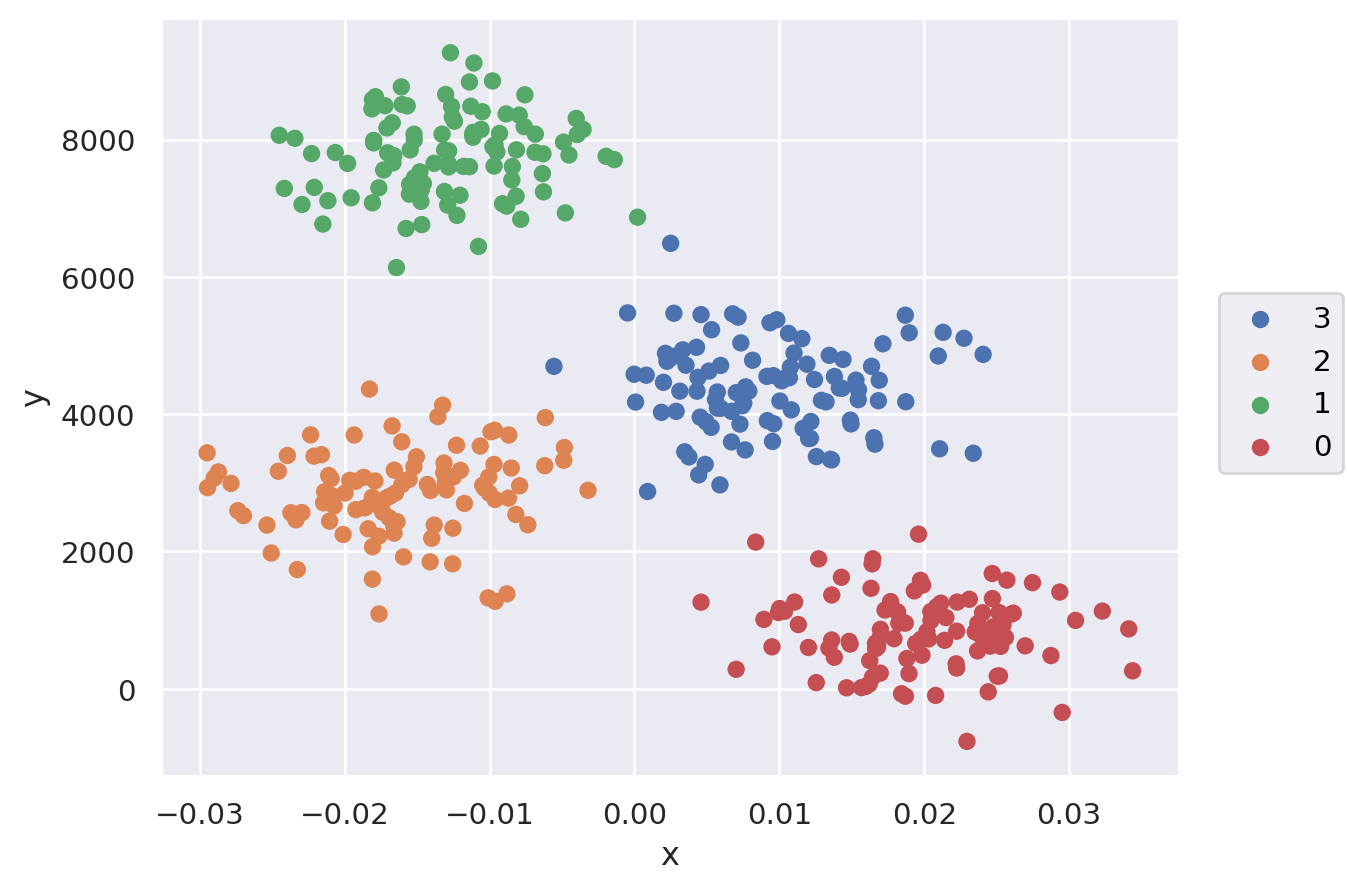

In [24]:
labels = KMeans(n_clusters=4).fit_predict(df_4_scaled)

(
    so.Plot(data=df_4, x='x', y='y', color=labels.astype('str'))
    .add(so.Dot())
)

Ahi va, insano.


### Ejercicio 5.
Implementar el algoritmo DBSCAN para analizar los sets de datos anteriores. Comparar los resultados con los obtenidos usando k-medias.


In [25]:
# implementamos algoritmo DBSCAN

```
DBSCAN(D, eps, MinPts)
   C = 0
   for each unvisited point P in dataset D
      mark P as visited
      NeighborPts = regionQuery(P, eps)
      if sizeof(NeighborPts) < MinPts
         mark P as NOISE
      else
         C = next cluster
         expandCluster(P, NeighborPts, C, eps, MinPts)

expandCluster(P, NeighborPts, C, eps, MinPts)
   add P to cluster C
   for each point P' in NeighborPts
      if P' is not visited
         mark P' as visited
         NeighborPts' = regionQuery(P', eps)
         if sizeof(NeighborPts') >= MinPts
            NeighborPts = NeighborPts joined with NeighborPts'
      if P' is not yet member of any cluster
         add P' to cluster C

regionQuery(P, eps)
   return all points within P's eps-neighborhood (including P)

```

intentar implementarlo dsps


#### Ejercicio 1

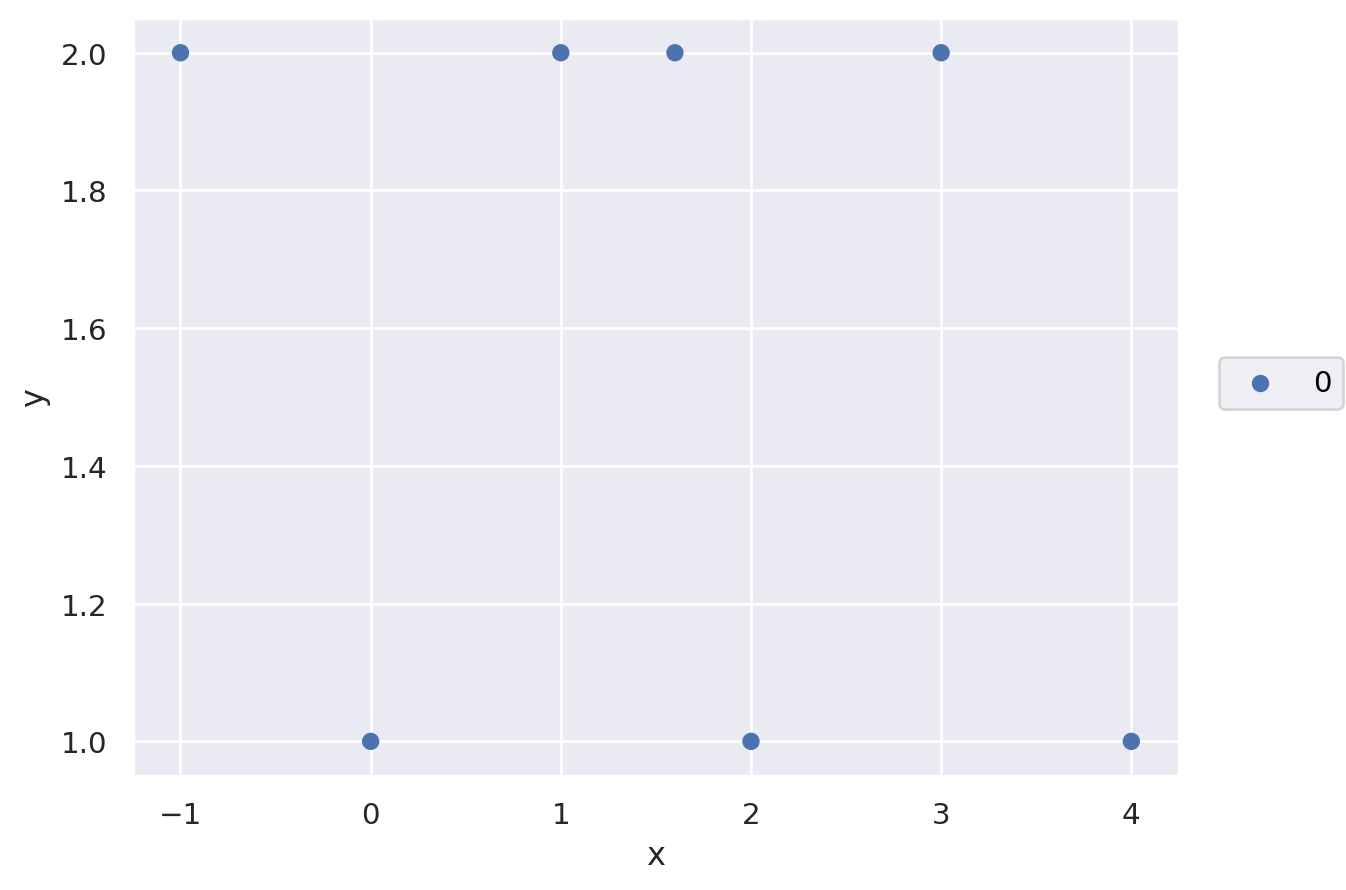

In [36]:
datos = pd.DataFrame({
    "x": [-1,0,1,8/5,2,3,4],
    "y":[2,1,2,2,1,2,1]
})

clustering = DBSCAN(eps=1.9,min_samples=1)
etiqueta = clustering.fit_predict(datos)

# Graficamos
(
    so.Plot(data = datos, x = "x", y = "y", color = etiqueta.astype("str"))
    .add(so.Dot())
)

no se si se podra..

#### Ejercicio 2

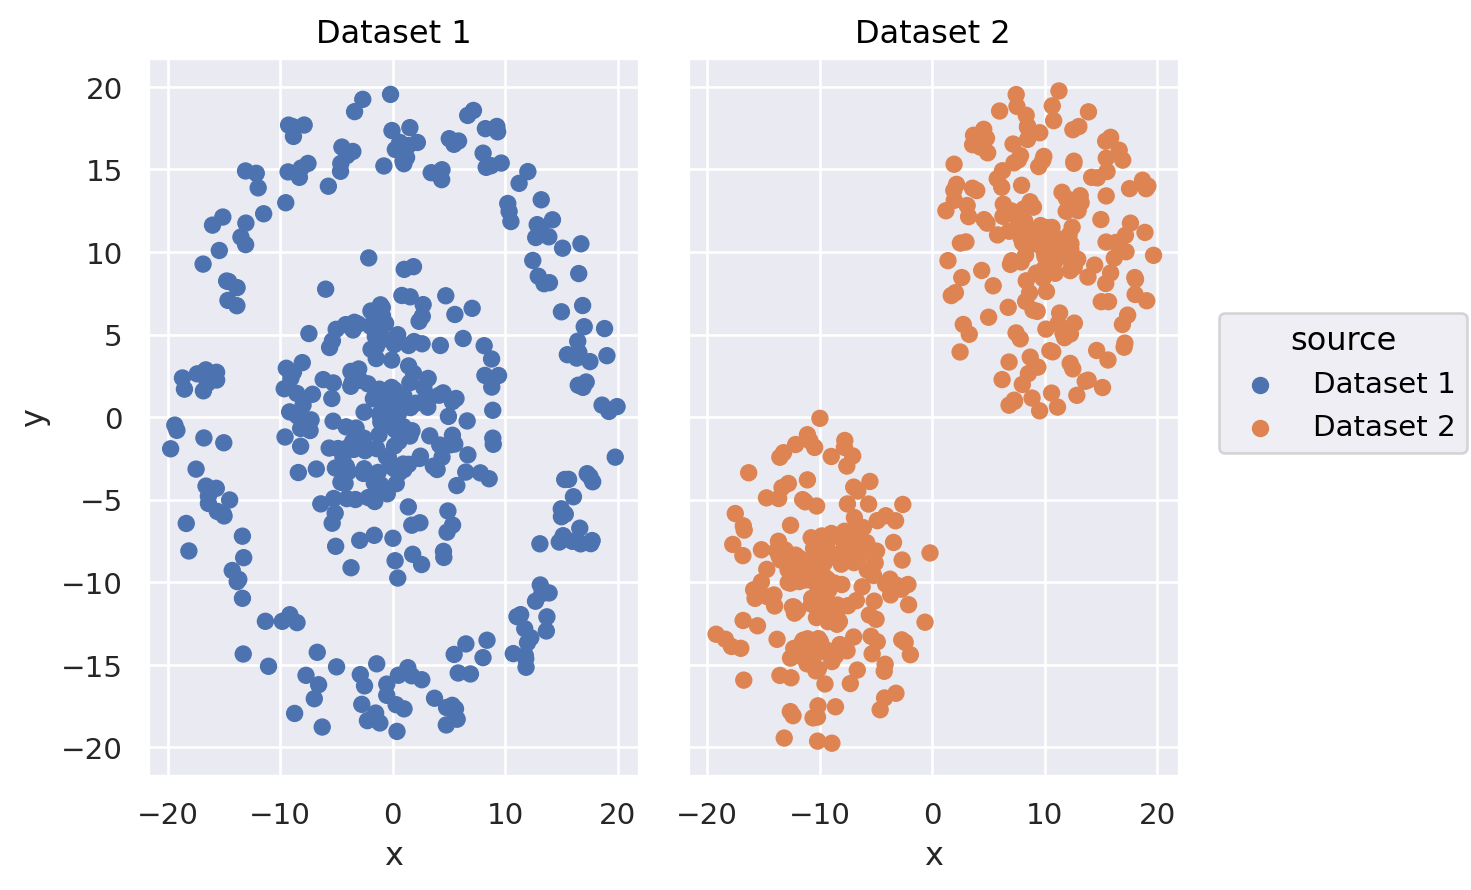

In [40]:
df1_orig = pd.read_csv(url_base + 'p7-data1.csv')
df2_orig = pd.read_csv(url_base + 'p7-data2.csv')

df1 = df1_orig.copy()
df2 = df2_orig.copy()

df1['source'] = 'Dataset 1'
df2['source'] = 'Dataset 2'
# buscar porque es necesario el ignore_index
df = pd.concat([df1, df2], ignore_index=True)

(
    so.Plot(data=df, x='x', y='y', color='source')
    .add(so.Dot())
    .facet(col='source') # repasar .facet()....
)

Claramente si los agrupamos individualmente, sale bien.
Veamos df:

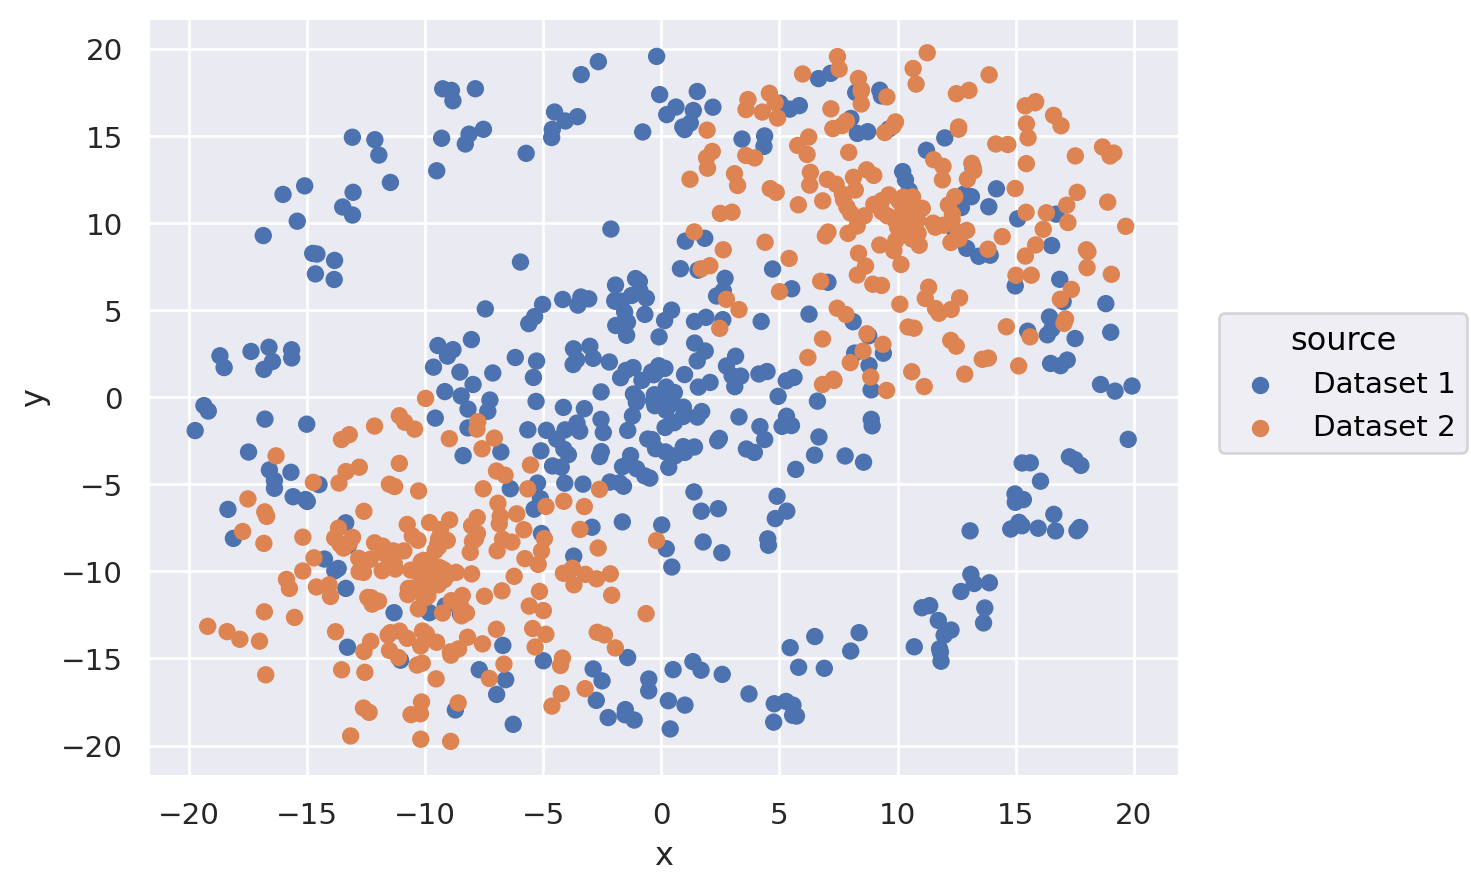

In [38]:
(
    so.Plot(data=df, x='x', y='y', color='source')
    .add(so.Dot())
)

Intentemos agrupar a cada dataset primero:

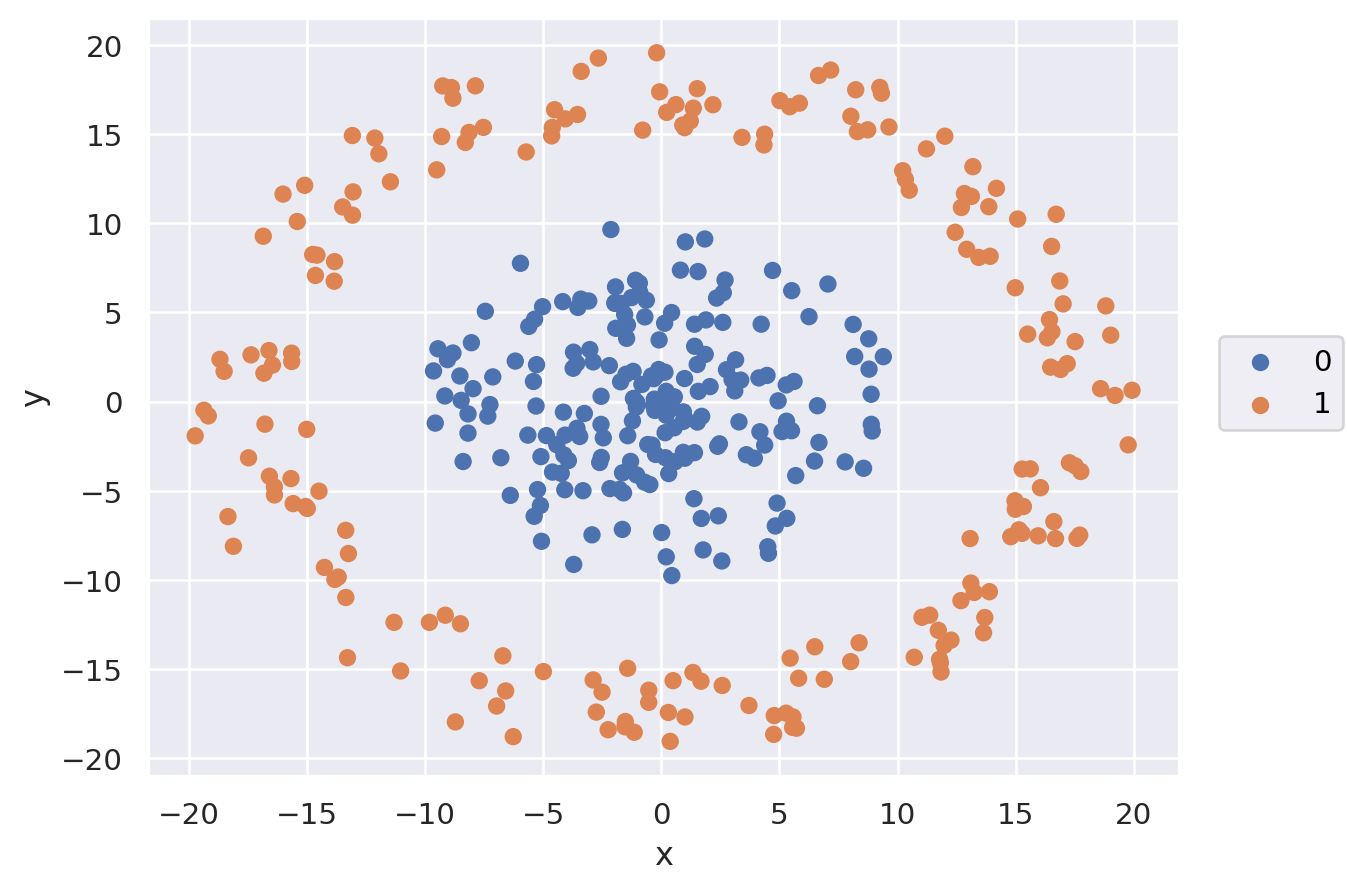

In [48]:
# primer dataset
clustering_df1 = DBSCAN(eps=4, min_samples=5)
etiquetas = clustering_df1.fit_predict(df1_orig)

(
    so.Plot(data=df1_orig, x='x', y='y', color=etiquetas.astype('str'))
    .add(so.Dot())
)

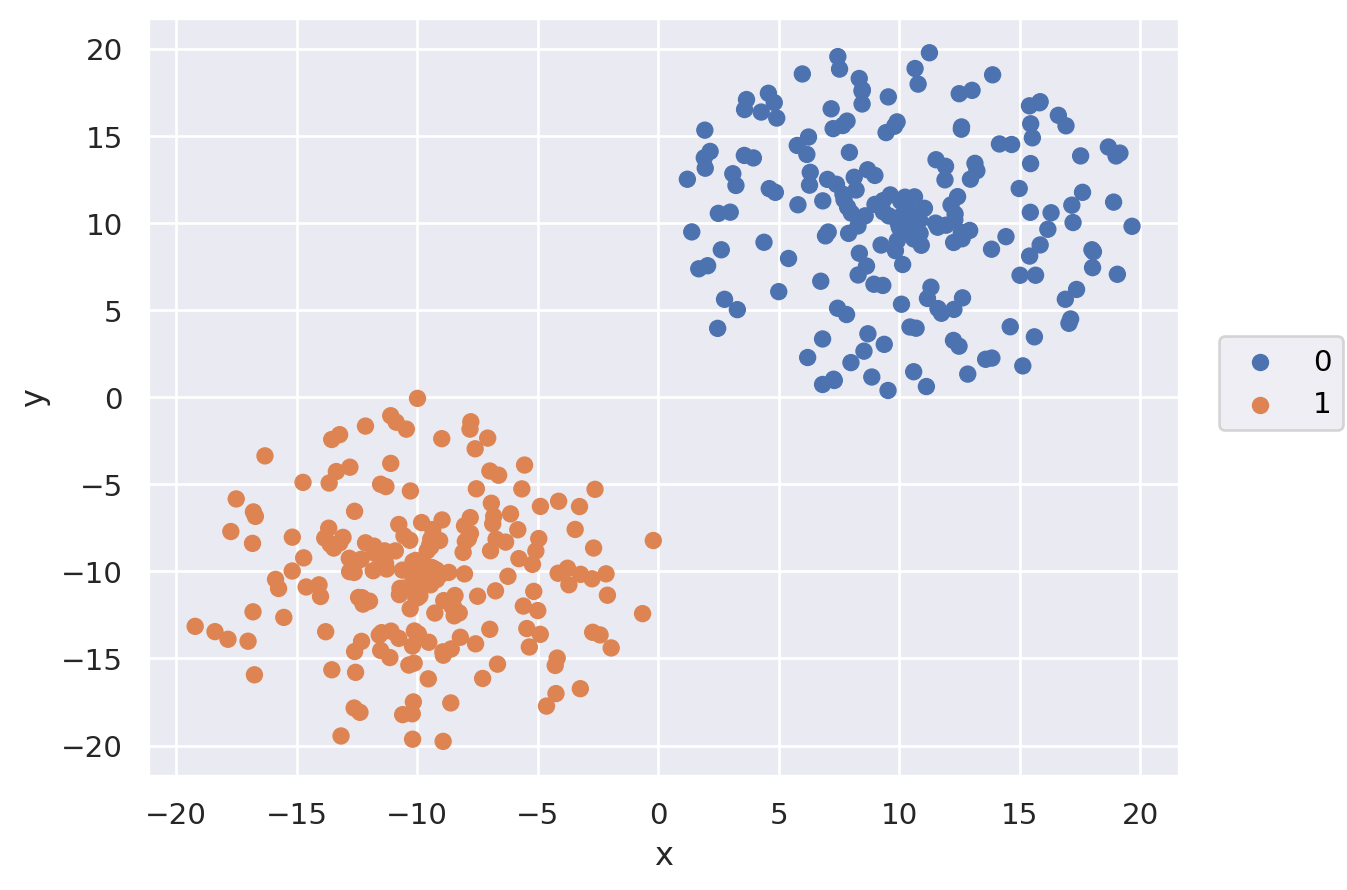

In [50]:
# segundo dataset
clustering_df2 = DBSCAN(eps=4, min_samples=5)
etiquetas = clustering_df2.fit_predict(df2_orig)

(
    so.Plot(data=df2_orig, x='x', y='y', color=etiquetas.astype('str'))
    .add(so.Dot())
)

Salia con K-Means igual este ultimo.

#### Ejercicio 3

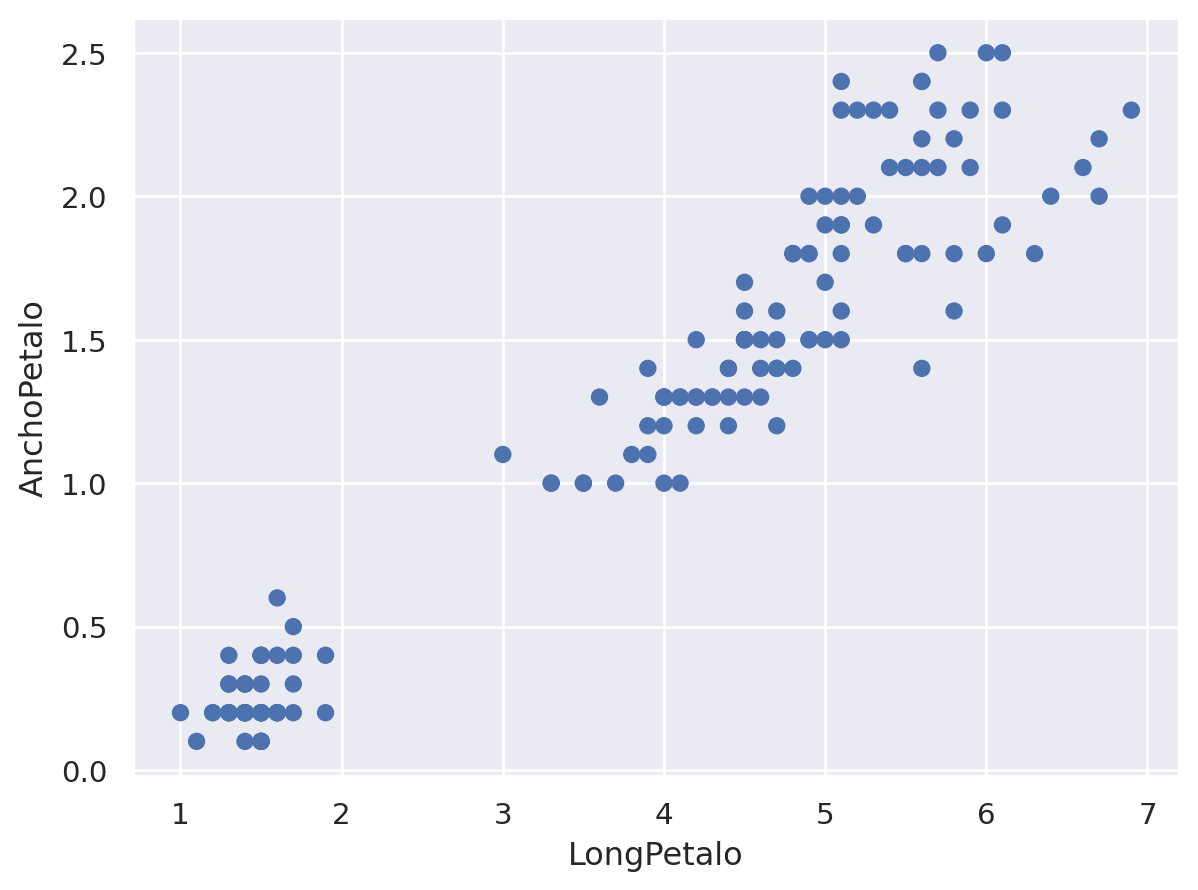

In [51]:
df_iris = pd.read_csv(url_base + 'p7-iris.txt', sep="\t")
df_iris.head()
(
    so.Plot(data=df_iris, x='LongPetalo', y='AnchoPetalo')
    .add(so.Dot())
)

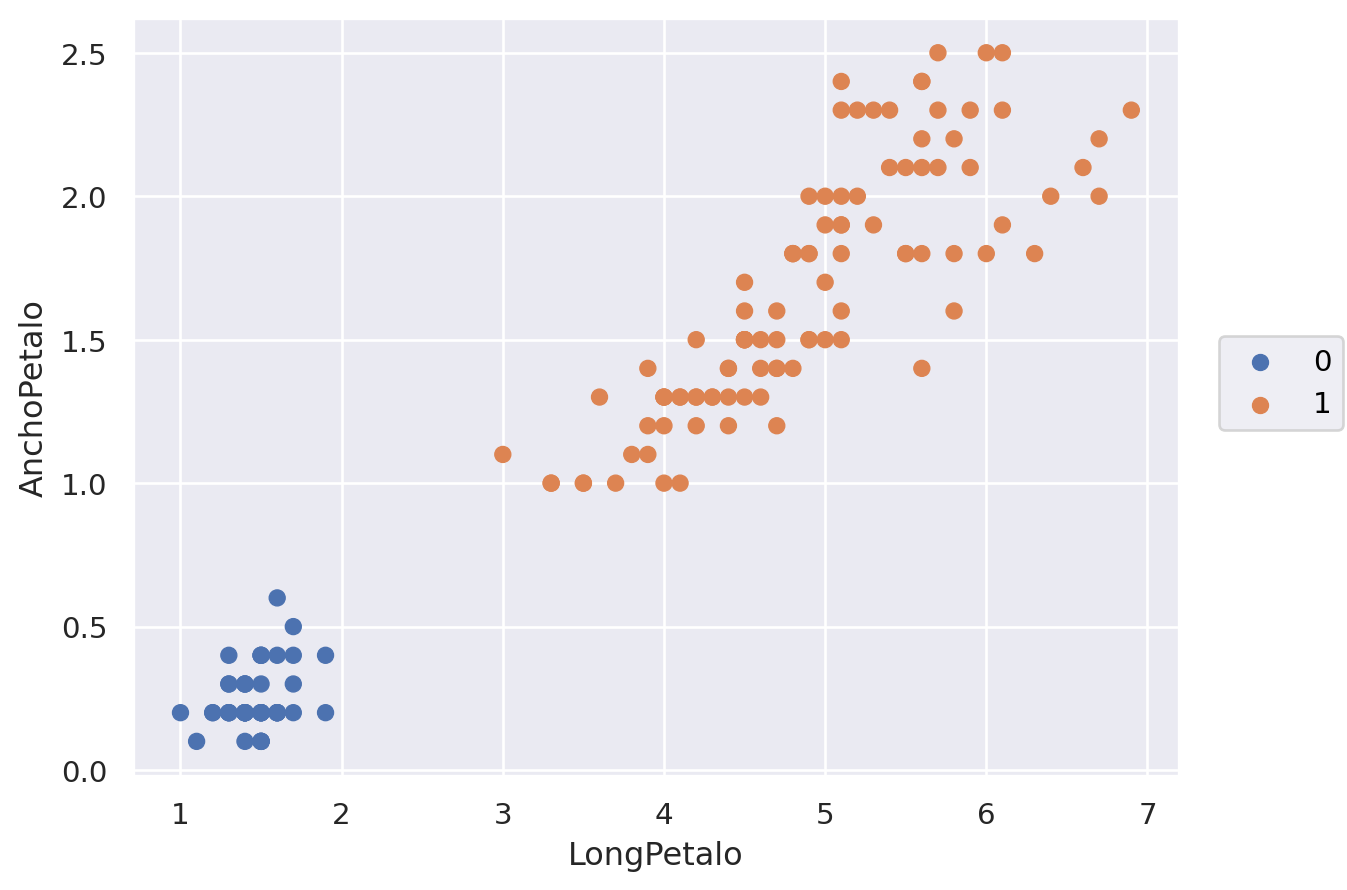

In [56]:
# creo clasificador DBSCAN
clustering = DBSCAN(eps=1, min_samples=4)
etiquetas = clustering.fit_predict(df_iris)
(
    so.Plot(data=df_iris, x='LongPetalo', y='AnchoPetalo', color=etiquetas.astype('str'))
    .add(so.Dot())
)


## Clasificacion



 ### Ejercicio 6.
 Implementar un clasificador de k-NN que prediga el sexo de los pinguinos utilizando como variables a el largo del pico y el largo de la aleta. Hacerlo para diferentes valores de k (impares) y evaluar el error de prediccion en cada caso. Como elegira el valor de k optimo?



 ### Ejercicio 7.
Implementar un clasificador de k-NN que prediga la especie de los pinguinos. Pueden elegir las variables. Con cuales variables obtienen mejores resultados? Reportar los resultados con visualizaciones adecuadas.